# Average by genre

## Importation de modules

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.tools import *
from src.utils.metrics import *
from src.utils.extract_data import transform_parquet_to_csv
from src.utils.metrics_plot import *
import numpy as np
from numpy.linalg import norm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix

## Dataframe des métriques

In [3]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

## Importation des données et mise en forme des dataframes

In [4]:
#df, le dataframe qu'on utilise avec les features décomposées
df=pd.read_csv('dataset.csv')


#variables utiles
n_titre = len(df) #nombre titres dans la base
n_audio = 256 #nombre de données audio
n_usage = 128 #nombre de données usage
n_label = 21 #nombre labels dans la base
p=1 #proportion de titres de la base utilisés

#dataframe des labels
labels = df.columns[1:22]
df_labels = pd.DataFrame(data=labels,columns=['Label'])

In [5]:
#Ajout colonne nombre de labels pour chaque titre
df=df.drop(columns = ['song_index'])
df["Nombre labels"] = df.iloc[:,0:21].sum(axis=1)

In [6]:
# df_unilabel: la base avec les titres ne comportant qu'un seul label
df= df[df["Nombre labels"] == 1]
df.drop(columns = ['Nombre labels'])

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
0,0,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
1,0,0,0,0,0,0,0,0,0,1,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
2,0,0,0,0,1,0,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
3,0,0,0,0,0,0,0,0,0,1,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
4,0,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,1,0,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
50558,0,0,0,0,0,0,0,1,0,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
50559,0,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504
50560,0,0,0,0,0,0,0,0,0,0,...,0.063921,0.000640,-0.081422,-0.012015,-0.046315,-0.112069,0.017265,-0.063093,-0.134029,-0.007111


## Séparation train-test

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

Y = df[labels]
X = df[["usage_feature_"+str(i) for i in range(1,n_usage+1)]+["audio_feature_"+str(i) for i in range(1,n_audio+1)]]
columns = X.columns
index = X.index

In [11]:
#normalisation L2 de X
X = normalize(X, norm='l2')
X = pd.DataFrame(X)
X.columns = columns
X.index=index
X

,usage_feature_1,usage_feature_2,usage_feature_3,usage_feature_4,usage_feature_5,usage_feature_6,usage_feature_7,usage_feature_8,usage_feature_9,usage_feature_10,...,audio_feature_247,audio_feature_248,audio_feature_249,audio_feature_250,audio_feature_251,audio_feature_252,audio_feature_253,audio_feature_254,audio_feature_255,audio_feature_256
0,-0.001152,-0.000603,-0.000308,-0.000937,-0.000591,0.003613,0.001785,-0.001279,0.003902,0.001582,...,-0.009191,0.136019,-0.031458,0.030521,-0.094679,-0.006749,0.019128,-0.026348,0.031680,-0.087473
1,0.000062,0.000023,-0.000343,0.001793,0.001089,-0.005083,-0.000369,-0.006073,0.002195,0.002254,...,0.035021,-0.009121,0.020994,-0.030791,-0.059712,0.009515,-0.069461,-0.012320,0.111025,-0.045204
2,-0.001274,0.000249,0.002699,0.002082,0.004371,0.001831,-0.001134,-0.007163,0.002380,0.000036,...,-0.026341,-0.007824,-0.025767,0.025758,-0.058356,0.140337,-0.031038,0.175235,-0.008969,-0.001871
3,0.001093,0.002345,0.000661,0.000134,-0.001684,-0.003185,0.001162,0.002669,0.001657,-0.008323,...,-0.026312,0.015941,-0.030031,-0.033264,-0.129863,0.009411,-0.003566,-0.043219,0.105218,-0.133631
4,0.001521,0.001977,0.000470,-0.002439,-0.003487,0.008192,0.004680,0.002229,-0.009798,-0.006628,...,-0.019374,-0.005888,-0.050258,0.043817,-0.070442,0.079896,-0.058927,-0.059168,0.010431,0.033031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,-0.000006,-0.000059,-0.000210,0.001571,0.000999,-0.001507,-0.000474,-0.012291,-0.004680,-0.001237,...,0.072490,-0.003775,-0.027386,0.015989,-0.007550,0.225186,-0.065988,0.133946,0.067022,0.013340
50558,0.002318,0.001495,-0.002373,-0.004416,0.001562,-0.000452,0.001212,-0.004830,0.007907,0.007509,...,0.052941,-0.005201,-0.021003,-0.011149,-0.070325,0.072696,-0.043616,-0.004127,0.106046,-0.085954
50559,-0.000032,0.000656,-0.000514,0.000142,-0.000841,-0.000378,-0.002937,0.001179,-0.002912,-0.002267,...,0.068145,0.018252,-0.034512,-0.025848,-0.106347,0.140916,-0.024241,0.062247,0.159617,-0.051518
50560,0.000340,-0.000455,-0.000682,0.001084,-0.005340,-0.123003,0.000223,-0.001267,0.018174,0.006628,...,-0.026898,-0.005080,-0.005331,0.013391,-0.105352,0.034541,-0.079354,0.144659,0.030325,0.032401


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [9]:
#le dataframe d'entraînement avec les sorties Y et les features X associées à chaque titre
df_train = pd.concat([X_train, y_train], axis = 1)

## Calcul des features moyennes pour chaque label

In [10]:
#le data frame avec les features moyennes de chaque label (moyenne calculée sur l'échantillon d'entraînement)
df_moyenne = pd.DataFrame(columns=df_train.columns)
for label in labels:
    df_moyenne.loc['Average_' + label] = df_train[df_train[label] == 1].mean(axis = 0)

In [11]:
#On ne garde que les moyennes des features
df_moyenne = df_moyenne[["usage_feature_"+str(i) for i in range(1,n_usage+1)]+["audio_feature_"+str(i) for i in range(1,n_audio+1)]]
df_moyenne

,usage_feature_1,usage_feature_2,usage_feature_3,usage_feature_4,usage_feature_5,usage_feature_6,usage_feature_7,usage_feature_8,usage_feature_9,usage_feature_10,...,audio_feature_247,audio_feature_248,audio_feature_249,audio_feature_250,audio_feature_251,audio_feature_252,audio_feature_253,audio_feature_254,audio_feature_255,audio_feature_256
Average_asian,-0.002035,0.004229,0.007000,-0.010597,-0.000284,0.000958,0.013179,-0.001138,-0.015527,0.025738,...,0.068365,0.019433,0.006901,-0.107624,-0.504103,0.291213,-0.231520,0.155128,0.785873,-0.432911
Average_rnb,-0.000336,0.002090,0.000808,0.003075,-0.004655,-0.001138,0.004046,0.000226,-0.005204,-0.014054,...,0.087780,0.093713,-0.189445,0.081826,-0.259644,0.914360,-0.243054,0.171340,0.351661,-0.362060
Average_reggae,-0.000141,0.003872,0.001037,-0.001266,-0.002296,0.000019,-0.008499,-0.004358,-0.008004,-0.012462,...,0.177771,0.012783,-0.185013,0.116685,-0.301291,0.739375,-0.321527,0.080225,0.288232,-0.136598
Average_blues,-0.006724,0.013851,-0.007441,0.022483,0.017995,-0.004618,0.036464,0.006752,-0.013808,0.009829,...,-0.032475,0.383354,0.060706,0.041389,-0.425152,-0.002120,-0.066983,-0.083296,0.288845,-0.253363
Average_pop,-0.002081,0.001227,0.003630,0.004238,0.003666,-0.014647,-0.003631,-0.034585,-0.009592,-0.013530,...,0.143503,0.061826,-0.133630,-0.027297,-0.425312,0.726881,-0.268248,0.260832,0.616263,-0.328573
Average_dance,-0.000865,-0.003225,-0.001300,0.003701,0.002952,-0.003051,-0.007365,-0.033034,-0.006238,0.006052,...,0.586614,0.264958,-0.205379,-0.084211,-0.509757,1.228591,-0.295355,0.258802,0.986605,-0.370501
Average_folk,0.009269,-0.003792,-0.028952,-0.003820,0.014663,0.024701,0.005863,0.007840,0.005049,0.000934,...,0.084017,0.133204,-0.017172,-0.119913,-0.584134,0.104479,0.035519,-0.079229,0.661865,-0.495017
Average_arabic-music,0.002577,0.001211,-0.001207,-0.002413,-0.000678,0.006618,0.000713,-0.008686,0.003730,-0.002949,...,0.210444,0.026091,-0.175939,0.050267,-0.296981,0.771978,-0.340453,0.196413,0.319848,-0.114639
Average_indie,0.003879,0.004101,-0.012088,-0.002484,0.004671,0.002637,0.001293,-0.009200,-0.007922,0.003215,...,0.156422,0.099851,-0.052993,-0.129685,-0.516369,0.459800,-0.155658,-0.000058,0.952618,-0.437358
Average_rock,0.003200,0.002119,-0.009982,-0.001235,0.010345,0.003472,-0.007780,-0.013283,0.002712,-0.001692,...,0.038585,0.056064,0.181373,-0.143579,-0.490318,0.092177,-0.217893,0.010877,0.941743,-0.393361


In [12]:
#le dataframe de test avec les sorties Y et les features X associées à chaque titre
df_test = pd.concat([X_test, y_test], axis = 1)
df_test.head(5)

,usage_feature_1,usage_feature_2,usage_feature_3,usage_feature_4,usage_feature_5,usage_feature_6,usage_feature_7,usage_feature_8,usage_feature_9,usage_feature_10,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
22761,-0.001154,0.006471,-0.004127,-0.000400,-0.008716,0.010958,-0.013348,-0.006945,0.004042,-0.022727,...,0,0,0,0,0,0,0,0,0,0
3424,-0.005371,-0.004566,-0.017364,0.020710,-0.007362,0.027553,0.002621,-0.005948,-0.000614,-0.001229,...,0,0,0,0,0,0,0,0,1,0
20205,0.005402,0.012528,-0.022178,-0.003695,-0.025548,-0.000576,0.036613,0.047720,-0.010509,-0.003706,...,0,0,0,0,0,1,0,0,0,0
4695,-0.016433,-0.003451,0.003493,0.005552,0.006695,0.021439,0.009787,-0.009052,0.034735,0.028071,...,0,0,0,0,0,0,1,0,0,0
36343,-0.013547,0.003135,0.005113,0.000660,-0.012150,0.020403,-0.012792,0.002753,0.030145,-0.001413,...,0,0,0,0,0,0,1,0,0,0


In [13]:
df_test1 = df_test[["usage_feature_"+str(i) for i in range(1,n_usage+1)]+["audio_feature_"+str(i) for i in range(1,n_audio+1)]]
df_test1.shape[0]

12801

## Cosine similarity

In [14]:
def cosine1(a,b):
    A = np.array(a)
    B = np.array(b)
 
    return np.dot(A,B)/(norm(A)*norm(B))

def cosine(a,b):
    A = np.array(a)
    B = np.array(b)
 
    return norm(A-B)

## Labels prédits

In [15]:
usage = ["usage_feature_"+str(i) for i in range(1,n_usage+1)]
audio = ["audio_feature_"+str(i) for i in range(1,n_audio+1)]

def prediction(features):
    y=[]
    X_t = X_test[features]
    df_m = df_moyenne[features]
    for i in range (X_test.shape[0]):
        s=[]
        for j in range(21):
            a= cosine(df_m.iloc[j,:],X_t.iloc[i,:])
            s.append(a)
        for k in range(len(s)):
            if s[k]== min(s):
                y.append(k)

    df_hat=pd.DataFrame(columns = labels) #le data frame des valeurs prédites
    for i in range(len(y)):
        pred = [0]*21
        pred[y[i]]=1
        df_hat.loc[i]=pred
    df_hat = df_hat.astype(str).astype(int)
    df_hat.index = y_test.index
    return(df_hat)

In [40]:
df_hat_UA = prediction(audio+usage)

In [41]:
df_hat_U = prediction(usage)
df_hat_A = prediction(audio)

In [17]:
#norme euclidienne sur les tests, avec usage et audio
final_res.loc['Average by genre Usage+audio']=all_metrics(y_test.values,df_hat_UA.values)
final_res.loc['Average by genre Audio']=all_metrics(y_test.values,df_hat_A.values)
final_res.loc['Average by genre Usage']=all_metrics(y_test.values,df_hat_U.values)
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Average by genre Usage+audio,0.487,0.487,0.487,0.487,0.049
Average by genre Audio,0.444,0.444,0.444,0.444,0.053
Average by genre Usage,0.795,0.795,0.795,0.795,0.019


In [ ]:
cm = sns.heatmap(conf[i]/np.sum(conf[i]), annot=True, cmap="Blues",fmt='.1%')
        # labels the title and x, y axis of plot
        cm.set_title('Normalized confusion matrix '+l[i]);
        cm.set_xlabel('Predicted Label')
        cm.set_ylabel('True Label');

        # labels the boxes
        cm.xaxis.set_ticklabels([l[i],"Other label"])
        cm.yaxis.set_ticklabels([l[i],"Other label"])
        plt.savefig(name_fig3 +" "+ l[i])
        plt.clf()
        plt.figure()

In [40]:
def plot_roc_curve_sup(y_test,y_hat_U,y_hat_A,y_hat_UA,title,save=False,name_fig=None):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_hat_UA)
    fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_hat_A)
    fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_hat_U)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    roc_auc2 = metrics.auc(fpr2, tpr2)
    plt.title(title)
    plt.plot(fpr1, tpr1, 'b', label = 'AUC audio = %0.2f' % roc_auc1)
    plt.plot(fpr2, tpr2, 'r', label = 'AUC usage = %0.2f' % roc_auc2)
    plt.plot(fpr, tpr, 'g', label = 'AUC audio and usage= %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    if not save:
        plt.show()
    else:
        plt.savefig(name_fig)
        plt.clf()
    return([roc_auc,roc_auc1,roc_auc2])
    
        
def plot_roc_curve_all(y_test,y_hat_U,y_hat_A,y_hat_UA, algo, save, name_ROC,name_AUC,name_fig3):
    auc_labels_U=[]
    auc_labels_A=[]
    auc_labels_UA=[]
    conf=multilabel_confusion_matrix(y_test,y_hat_UA)
    l = l=['asian','rnb','reggae','blues', 'pop','dance','folk','arabic-music', 'indie', 'rock', 'soulfunk', 'latin', 'classical', 'k-pop','brazilian', 'metal','rap', 'jazz','electronic','african','country']
    for i in range(len(l)): #pour chaque label, ROC curve
        AUC= plot_roc_curve_sup(y_test[:,i], y_hat_U[:,i],y_hat_A[:,i],y_hat_UA[:,i],"ROC curve "+ l[i],save=save,name_fig=name_ROC +" "+ l[i])
        auc_labels_U.append(AUC[2])
        auc_labels_A.append(AUC[1])
        auc_labels_UA.append(AUC[0])
        plt.figure()
        
    graph_auc(auc_labels_U,algo+" "+"Usage",save=save,name_fig=name_AUC+" "+"Usage")
    plt.figure()
    graph_auc(auc_labels_A,algo+" "+"Audio",save=save,name_fig=name_AUC+" "+"Audio")
    plt.figure()
    graph_auc(auc_labels_UA,algo+" "+"Usage et audio",save=save,name_fig=name_AUC+" "+"Usage et audio")

C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\22sir\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

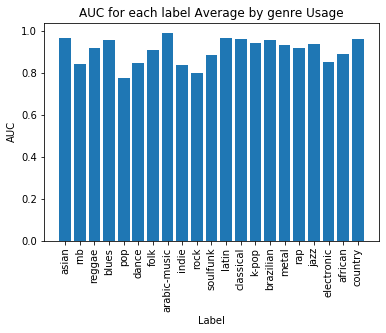

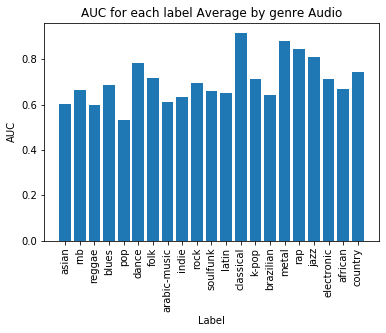

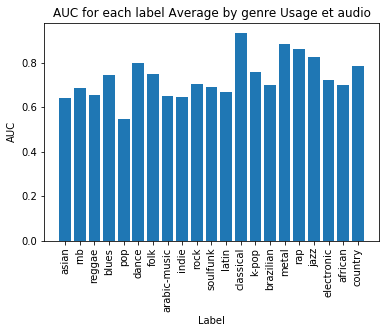

In [43]:
import seaborn as sns
name_AUC=os.path.join(project_dir,'docs/Average_genre/AUC_Average_genre_audio_usage/')
name_ROC= os.path.join(project_dir,'docs/Average_genre/ROC_Average_genre_audio_usage/')
name_fig3=os.path.join(project_dir,'docs/Average_genre/AUC_Average_genre_audio_usage/')

plot_roc_curve_all(y_test.values,df_hat_U.values,df_hat_A.values,df_hat_UA.values,"Average by genre", True,name_ROC,name_AUC,name_fig3)